In [1]:
import matplotlib.pyplot as plt
from cellularautomata import ca_image, elementary_ca_rule, show_rule, find_rule_number

%matplotlib inline

# Computing in the Small
## Week 5 Cellular Automata
This week we look at [cellular automata](https://math.hws.edu/eck/js/edge-of-chaos/CA-info.html).  A one-dimensional cellular automaton (CA) consists of a row of “cells,” where each cell can be in one of several “states.” Imagine these cells as squares, with each state represented as a number from $0,..., k - 1$.

A fixed rule dictates how the states of these cells change from one generation to the next. The state of a cell in the next generation depends only on its current state and the states of its $r$ immediate neighbors.

Cellular automata are a rich field of study and they were the subject of a doctoral dissertation for one of your instructors.

Unlike previous notebooks, this week a lot of the details have bene moved to a separate file [cellularautomata.py](https://github.com/lymanhurd/computinginthesmall/blob/main/week5/cellularautomata.py) which you are welcome to look at and which is part of the same github repository as the notebook, but by separating it we can concentrate a bit more on the underlying math.

## Elementary Cellular Automata
In what follows, we take the simplified case where $k$ is 2 (the state is either $0$ or $1$) and we look at the *immediate* neighbors, $r = 1$.  This special case form the *elementary* cellular automata.

As one example we take the function that takes the maximum value of the site and its two neighbors.  Think about what you would expect to see if you start with a single $1$.  We wrote a small program `show_rule` to help us visualize.

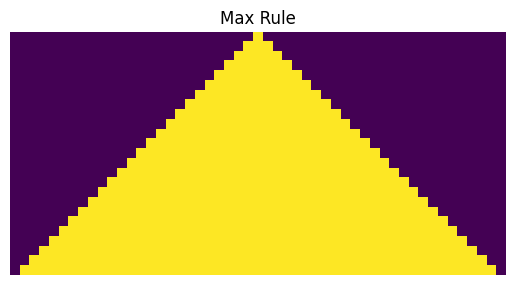

In [4]:
def maxrule(x, y, z):
    return max(x, y, z)

show_rule("Max Rule", maxrule)

Defining a rule requires us to know how to handle all $2 \times 2 \times 2$ possible combinations of the current square and its left and right neighbor, i.e., the values associated with:

- $(0, 0, 0)$
- $(0, 0, 1)$
- $(0, 1, 0)$
- $(0, 1, 1)$
- $(1, 0, 0)$
- $(1, 0, 1)$
- $(1, 1, 0)$
- $(1, 1, 1)$

which is just the numbers $0$ to $7$ written in binary!  Using Python formatting `{i:03b}` just means write `i` in binary using three digits padded by zeroes.

In [48]:
for i in range(8):
    print(f"decimal {i} is binary {i:03b}")

decimal 0 is binary 000
decimal 1 is binary 001
decimal 2 is binary 010
decimal 3 is binary 011
decimal 4 is binary 100
decimal 5 is binary 101
decimal 6 is binary 110
decimal 7 is binary 111


To figure out how many elementary rules are possible,  we get to decide whether each of these eight possible inputs goes to a $0$ or a $1$ which gives
$$2^8 = 2 \times 2 \times 2 \times 2 \times 2 \times 2 \times 2 \times 2 = 256$$
possible rules.  We can assign each rule a number by writing down the binary number starting with where it maps $(1,1,1)$ on down to where it maps $(0,0,0)$.  For example, our `maxrule` function has rule number:

In [5]:
find_rule_number(maxrule)

(0, 0, 0) --> 0
(0, 0, 1) --> 1
(0, 1, 0) --> 1
(0, 1, 1) --> 1
(1, 0, 0) --> 1
(1, 0, 1) --> 1
(1, 1, 0) --> 1
(1, 1, 1) --> 1
Rule: binary 0b11111110 --> decimal 254


Another simple rule replaces each square with the value of the square on its left.

In [7]:
def shift(x, y, z):
    return x

We can explicitly print out a few generations and see what happens.

In [8]:
ca_image(shift, gen=10)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

Graphically:

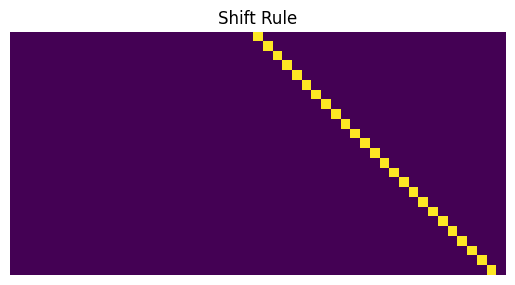

In [9]:
show_rule("Shift Rule", shift)

It is sometimes helpful to see what happens to a random starting condition.  For this purpose we have another parameter to `show_rule` called `random_init`.

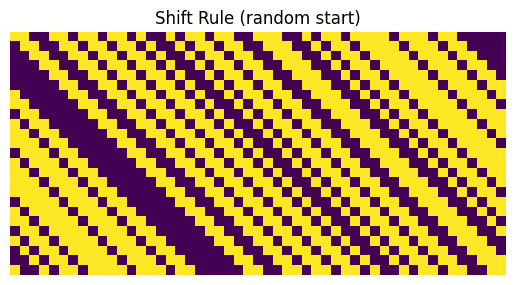

In [11]:
show_rule("Shift Rule (random start)", shift, random_init=True)

Again the shift rule has a number:

In [12]:
find_rule_number(shift)

(0, 0, 0) --> 0
(0, 0, 1) --> 0
(0, 1, 0) --> 0
(0, 1, 1) --> 0
(1, 0, 0) --> 1
(1, 0, 1) --> 1
(1, 1, 0) --> 1
(1, 1, 1) --> 1
Rule: binary 0b11110000 --> decimal 240


## Pascal's Triangle
Recall we studied Pascal's triangle $\mod 2$ and got a nested pattern (also caled a [Sierpinski Sieve (or Gasket)](https://mathworld.wolfram.com/SierpinskiSieve.html) after a Polish mathematician).  There are actually three cellular automata rules that give this pattern.
 $2$.

In [19]:
def pascal_right(x, y, z):
    return (x + y) % 2

find_rule_number(pascal_right)

(0, 0, 0) --> 0
(0, 0, 1) --> 0
(0, 1, 0) --> 1
(0, 1, 1) --> 1
(1, 0, 0) --> 1
(1, 0, 1) --> 1
(1, 1, 0) --> 0
(1, 1, 1) --> 0
Rule: binary 0b00111100 --> decimal 60


In [20]:
def pascal_center(x, y, z):
    return (x + z) % 2

find_rule_number(pascal_center)

(0, 0, 0) --> 0
(0, 0, 1) --> 1
(0, 1, 0) --> 0
(0, 1, 1) --> 1
(1, 0, 0) --> 1
(1, 0, 1) --> 0
(1, 1, 0) --> 1
(1, 1, 1) --> 0
Rule: binary 0b01011010 --> decimal 90


In [21]:
def pascal_left(x, y, z):
    return (y + z) % 2

find_rule_number(pascal_left)

(0, 0, 0) --> 0
(0, 0, 1) --> 1
(0, 1, 0) --> 1
(0, 1, 1) --> 0
(1, 0, 0) --> 0
(1, 0, 1) --> 1
(1, 1, 0) --> 1
(1, 1, 1) --> 0
Rule: binary 0b01100110 --> decimal 102


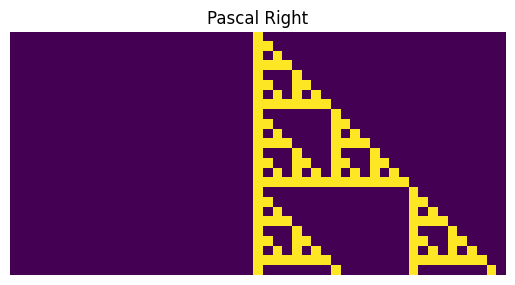

In [15]:
show_rule("Pascal Right", pascal_right)

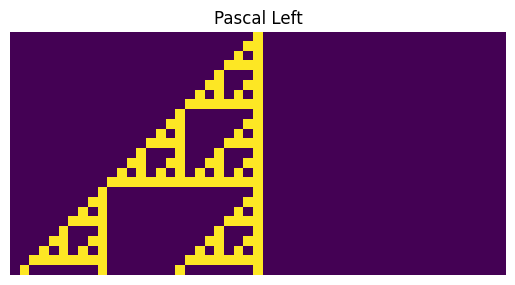

In [16]:
show_rule("Pascal Left", pascal_left)

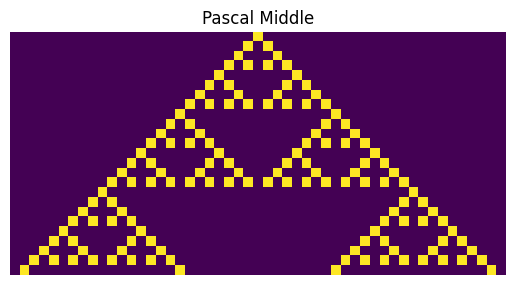

In [18]:
show_rule("Pascal Center", pascal_center)

The last rule is especially interesting as it updates the even squares on one row solely from the odd cells on the previous row and vice versa.  Put another way, if you think of it running on a chessboard, the red squares would only be affected by red squares and the black squares by black squares.

## More Complex Rules
As we discussed in a previous lecture, Pascal's triangle has a fast way to compute what happens even at really high numbers of iterations.  However, this is not true for all cellular automata.  In addition to our function `find_rule_number` that tells us what number if associated with a specific rule, we can go the other way.  The function `elementary_ca_rule(n)` returns the rule for a specific number.

Rule $30$, for example, gives rise even from a simple starting state to a seemingly random set of values if we look at the values at the central square

In [49]:
find_rule_number(elementary_ca_rule(30))

(0, 0, 0) --> 0
(0, 0, 1) --> 1
(0, 1, 0) --> 1
(0, 1, 1) --> 1
(1, 0, 0) --> 1
(1, 0, 1) --> 0
(1, 1, 0) --> 0
(1, 1, 1) --> 0
Rule: binary 0b00011110 --> decimal 30


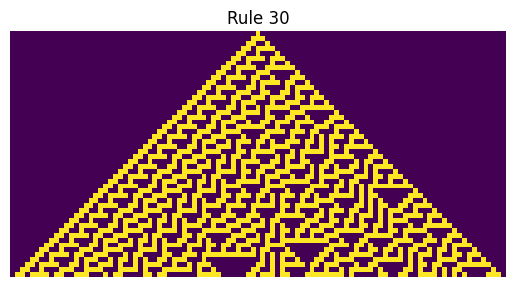

In [22]:
show_rule("Rule 30", elementary_ca_rule(30), gen=50)

Here we generate the matrix of $0$'s and $1$'s and make a list of just the center values, which we then plot to illustrate the lack of a discernible pattern.

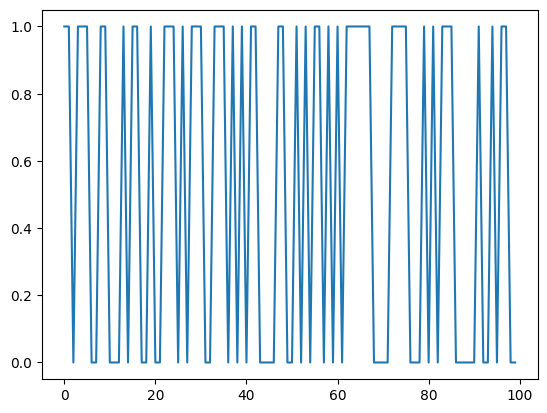

In [8]:
rule30 = ca_image(elementary_ca_rule(30), gen=100)
center = [row[100] for row in rule30]

plt.plot(center)

## More Possibiilities
Let's use the power of Python to generate pictures for a random rule from $0-255$.  Try re-evaluating the following cell a number of times by clicking in it and typing *ctl-enter*.

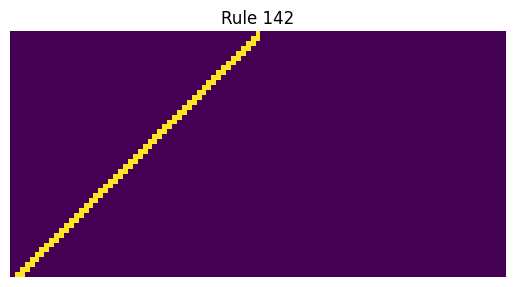

In [47]:
from random import randint
rule_number = randint(0, 255)
show_rule(f"Rule {rule_number}", elementary_ca_rule(rule_number), gen=50)

## A Cellular Automata Computer
One particularly important elementary cellular automaton is rule $110$.

In [25]:
def rule110(x, y, z):
    return (y | z) ^ (x & y & z)

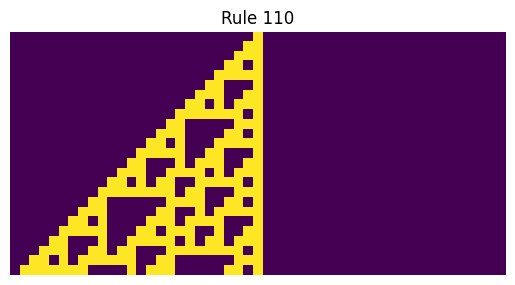

In [26]:
show_rule("Rule 110", rule110)

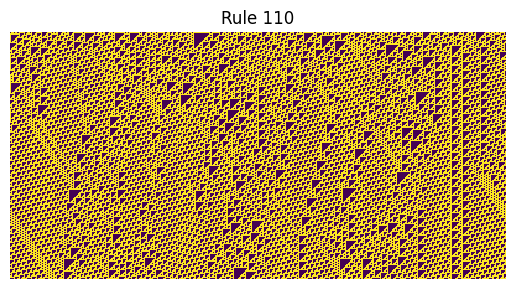

In [27]:
show_rule("Rule 110", rule110, gen=200, random_init=True)

In the paper [*Universality in Elementary Cellular Automata*](https://wpmedia.wolfram.com/sites/13/2018/02/15-1-1.pdf), Matthew Cook presents a proof of a conjecture by Stephen Wolfram that Rule $110$ is capable of uninversal computation.  He quotes Marvin Minsky as describing a universal system as being a "...completely general instruction-obeying mechanism."  Put another way, any computer program can be written as an initial sequence for this cellular automaton and the results of running the program can be derived from subsequent generations.  To bring things full circle, this property is also shared by some *Post Tag* systems and by generalized the *Collatz* functions.  Equivalently we say that Rule 110 can simulate a **Universal Turing Machne**.

### Last Thoughts
Your instructors hope you have enjoyed this class.  We wanted to leave you with some places to learn more.  And please remember that these notebooks are not going anywhere and you can open them at any time and extend them with your own Python (although saving your work will require some installation).

#### Python Links
-[Python for Kids](https://www.geeksforgeeks.org/python-for-kids/)

-[15 Free Python for Kids Resources Online for 8-18 Year Olds](https://www.create-learn.us/blog/free-python-kids-resources/)

-[The Beginner's Guide to Python Turtle](https://realpython.com/beginners-guide-python-turtle/)

-[Introduction to Programming in Python Turtle Graphics](https://www.cs.utexas.edu/~byoung/summer-python-class/summer15-turtle-graphics.pdf)
